In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
ROOT_DIR = os.path.dirname(os.path.abspath("top_level_file.txt"))
DELAY_PATH = os.path.join(ROOT_DIR, "data/route_data/ttc-bus-delay-data-2020_final.xlsx")
OUTPUT_PATH = os.path.join(ROOT_DIR, "output")

def save_fig(name):
    path = OUTPUT_PATH + "/" + name + ".png"
    plt.savefig(path)

mpl.rcParams['font.family'] = 'SF Mono'
mpl.rcParams['font.size'] = 12

# Count of Delay Type vs. Mean Delay Time, Jan 2020

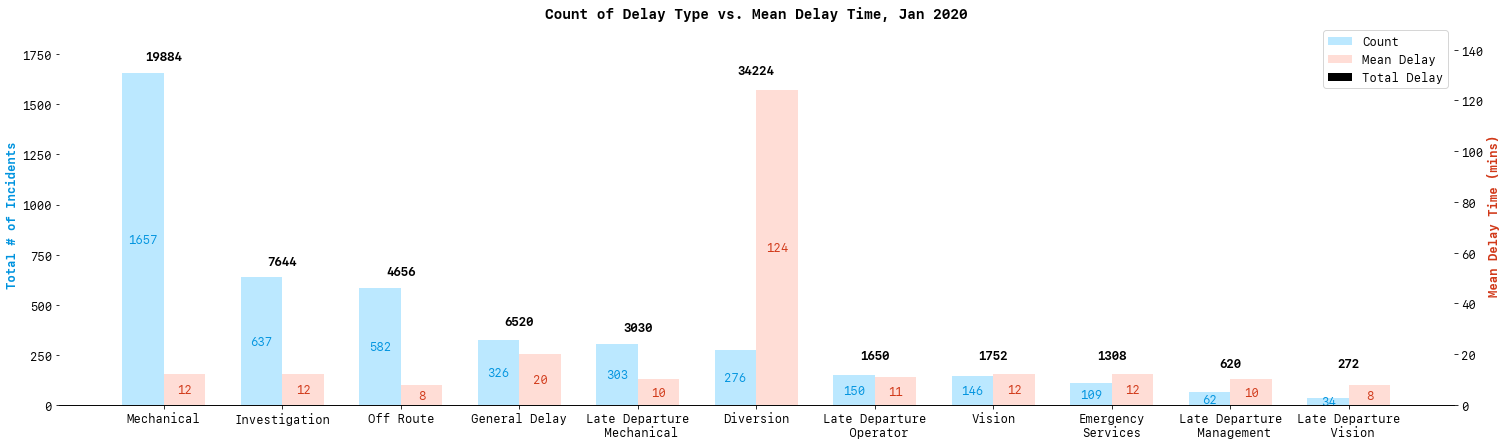

In [5]:
df = pd.read_excel(DELAY_PATH, sheet_name='Jan')

fig, ax = plt.subplots(figsize=(25, 7))
ax2 = ax.twinx()
df_grouped = df.groupby(by="Incident", sort=True)
grouped_dict = df_grouped.size().to_dict()
sorted_grouped_dict = sorted(grouped_dict.items(), key=lambda x: x[1], reverse=True)
sorted_grouped_dict = dict([(k, v) for (k, v) in sorted_grouped_dict])

x_lbls = sorted_grouped_dict.keys()
X = np.arange(len(x_lbls))
annotation_y = [1720, 700, 650, 400, 370, 1650, 230, 230, 230, 190, 190]
width = 0.35

for i, (key, value) in zip(X, sorted_grouped_dict.items()):
    countbar = ax.bar(i - width * 0.5, value, width=width, color='#BBE8FF', label='Count')
    ax.annotate(value, xy=(i - width * 0.5, value * 0.5), ha='center', va='center', color='#0194DF')
    
    mean = round(df[df['Incident']==key]['Delay'].mean())
    _totalplot = ax.bar(np.nan, np.nan, color='black', label="Total Delay")
    ax.annotate(mean * value, xy=(i, annotation_y[i]), ha='center', color='black', weight='bold', fontsize=12)
    
    meanbar = ax2.bar(i + width * 0.5, mean, width=width, color='#FFDDD6', label='Mean Delay')
    ax2.annotate(mean, xy=(i + width * 0.5, mean * 0.5), ha='center', va='center', color='#D13919')

x_lbls = list(x_lbls)
for i, lbl in enumerate(x_lbls):
    if 'Util' in lbl:
        x_lbls[i] = "Off Route"
    elif 'Late' in lbl:
        x_lbls[i] = x_lbls[i].replace('Leaving Garage -', 'Departure\n')
    elif 'Emer' in lbl:
        x_lbls[i] = "Emergency\nServices"
        
for axis in [ax, ax2]:
    for side in ['top', 'right', 'left']:
        axis.spines[side].set_visible(False)
        
ax.set_ylim(0, 1900)
ax2.set_ylim(0, 150)
ax2.set_ylim()
ax.set_xticks(X)
ax.set_xticklabels(x_lbls)
ax.set_ylabel('Total # of Incidents', weight='bold', color='#0194DF')
ax2.set_ylabel('Mean Delay Time (mins)', weight='bold', color='#D13919')
ax.set_title('Count of Delay Type vs. Mean Delay Time, Jan 2020', weight='bold', fontsize='14')
ax.legend(handles=[countbar, meanbar, _totalplot])

save_fig("jan_breakdown")

plt.show()

# Month-over-month Comparison

In [197]:
sheets = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_list = []

for sheet in sheets:
    df = pd.read_excel(DELAY_PATH, sheet_name=sheet)
    df['Month'] = sheet
    df_list.append(df)

df_2020 = pd.concat(df_list, ignore_index=True)

In [301]:
for i in df_2020.index:
    val = df_2020['Incident'][i]
    if "Late" in val:
        if "Mech" in val:
            df_2020['Incident'][i] = "Mechanical"
        elif "Management" in val:
            df_2020['Incident'][i] = "Management"
        elif "Operator" in val:
            df_2020['Incident'][i] = "Operator"
        elif "Vision" in val:
            df_2020['Incident'][i] = "Vision"
        else:
            df_2020['Incident'][i] = "General Delay"
    
    elif "Mech" in val:
        df_2020['Incident'][i] = "Mechanical"
    elif "Secu" in val or "Investi" in val:
        df_2020['Incident'][i] = "Security /\nInvestigation"
    elif "Road" in val:
        df_2020['Incident'][i] = "Road Block"
    elif "Opera" in val:
        df_2020['Incident'][i] = "Operator"
    elif "Utili" in val:
        df_2020['Incident'][i] = "Off Route"
    elif "Colli" in val:
        df_2020['Incident'][i] = "Collision"
    elif "Emer" in val:
        df_2020['Incident'][i] = "Emergency\nServices"
        
df_2020.head()

<ipython-input-301-dd8b27106425>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Incident'][i] = "Mechanical"
<ipython-input-301-dd8b27106425>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Incident'][i] = "Security /\nInvestigation"
<ipython-input-301-dd8b27106425>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Incident'][i] = "Operator"
<ipython-input-301-dd8b27106425>:28: SettingWithCopyWarning: 
A

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,Month
0,2020-01-01,94.0,00:01:00,Wednesday,Ossington station and Castle Frank Station,General Delay,10.0,20.0,B/W,NaN,Jan
1,2020-01-01,320.0,01:31:00,Wednesday,Yonge @ Queen,Diversion,1.0,1.0,B/W,NaN,Jan
2,2020-01-01,29.0,01:37:00,Wednesday,Dufferin loop,Mechanical,8.0,14.0,N/B,9028.0,Jan
3,2020-01-01,102.0,01:40:00,Wednesday,Warden station,Mechanical,11.0,22.0,N/B,8504.0,Jan
4,2020-01-01,68.0,01:42:00,Wednesday,Warden Station,Mechanical,8.0,23.0,N/B,8721.0,Jan


[Text(0.0, 0, 'JAN'),
 Text(1.2000000000000002, 0, 'FEB'),
 Text(2.4000000000000004, 0, 'MAR'),
 Text(3.6000000000000005, 0, 'APR'),
 Text(4.800000000000001, 0, 'MAY'),
 Text(6.000000000000001, 0, 'JUN'),
 Text(7.200000000000001, 0, 'JUL'),
 Text(8.400000000000002, 0, 'AUG'),
 Text(9.600000000000001, 0, 'SEP'),
 Text(10.8, 0, 'OCT'),
 Text(12.000000000000002, 0, 'NOV'),
 Text(13.200000000000001, 0, 'DEC')]

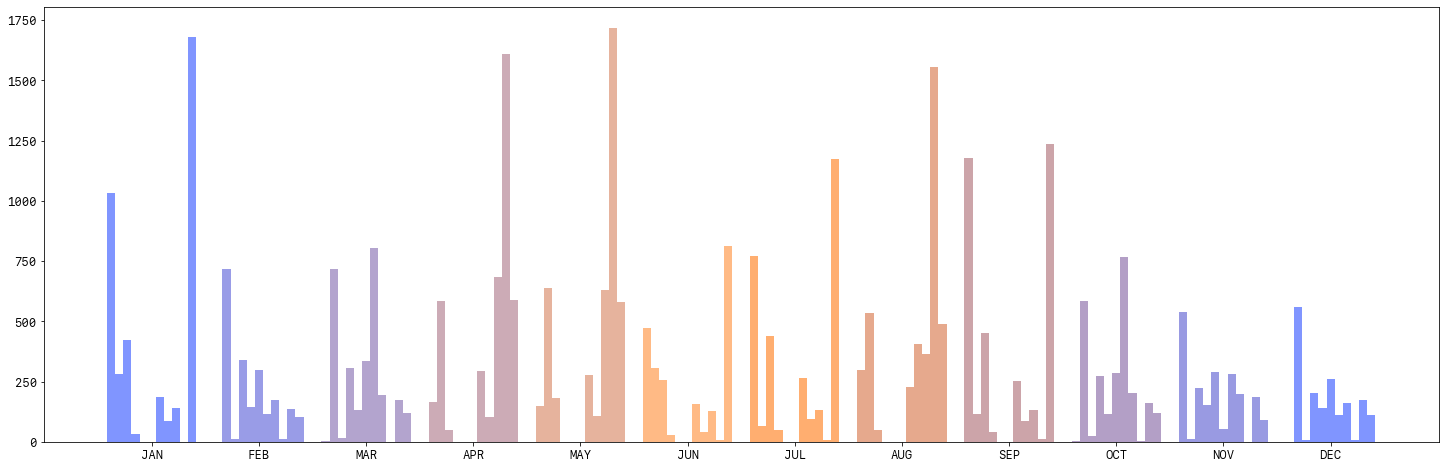

In [302]:
df_grouped_month = df_2020.groupby(by='Month')

fig, ax = plt.subplots(figsize=(25, 8))
X = np.linspace(0, len(sheets)*1.1, num=12)

width = 1/11
x_color = ["8095FF","999CE7","B3A4CE","CCABB6","E6B39D","FFBA85","FFAE70","E6A98D","CCA4A9","B39FC6","999AE2","8095FF"]
cnt = 0

for i, (month, group_month) in zip(X, df_grouped_month):
    x_list = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    for j, (incident, group_incident) in zip(x_list, group_month.groupby(by='Incident')):
        inc = ax.bar(i + width * x_list[j], group_incident.shape[0], label=incident, width=width, color="#" + x_color[cnt])
    cnt += 1
        
ax.set_xticks(X)
ax.set_xticklabels([mth.upper() for mth in sheets])

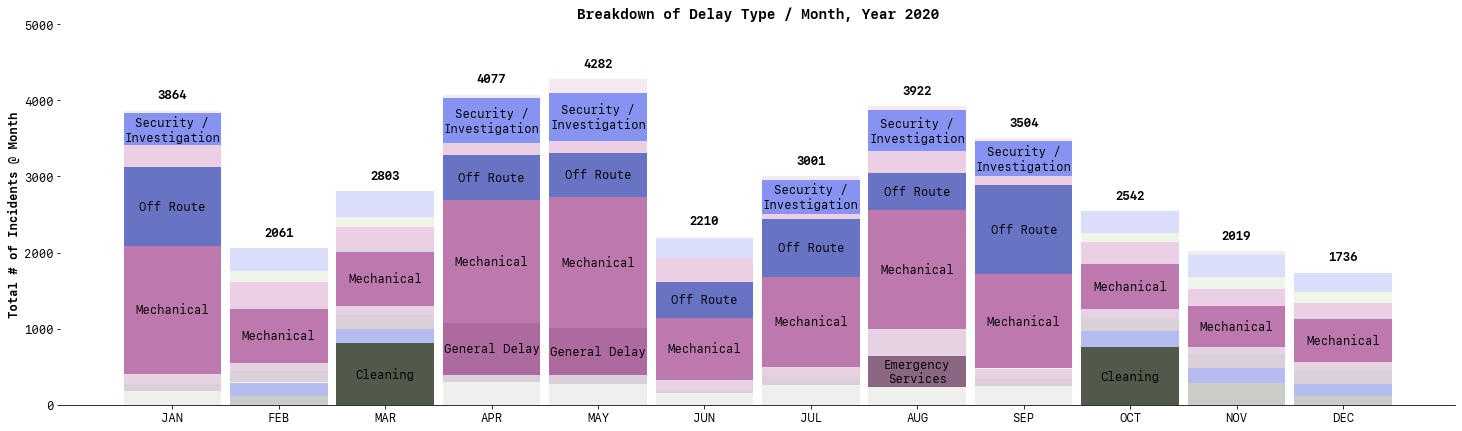

In [338]:
df_grouped_month = df_2020.groupby(by='Month')
        
fig, ax = plt.subplots(figsize=(25, 7))
X = np.linspace(0, len(sheets)*1.5, num=12)

width = 1.5
x_color = ["51594A","0c23cc","cacfc6","8a6682","ad6a9f","d3edbe","bd79ae","6873c4","bf60ab","cbe3b8","8693f0","DBBDD5"]
incidents = list(df_2020['Incident'].unique())
incidents.sort()
x_color = dict([(k, v) for (k, v) in zip(incidents, x_color)])

for i, (month, group_month) in zip(X, df_grouped_month):
    bottom = 0
    for j, (incident, group_incident) in zip(x_list, group_month.groupby(by='Incident')):
        if group_incident.shape[0] > 400:
            inc = ax.bar(i, group_incident.shape[0], bottom=bottom, label=incident, width=width, color="#" + x_color[incident])
        else:
            inc = ax.bar(i, group_incident.shape[0], bottom=bottom, label=incident, width=width, alpha=0.3, color="#" + x_color[incident])
        if group_incident.shape[0] > 400:
            ax.annotate(incident, xy=(i, bottom + (group_incident.shape[0]) * 0.5), ha='center', va='center')
        bottom += group_incident.shape[0]
    ax.annotate(bottom, xy=(i, bottom+200), ha='center', va='center', weight='bold')

ax.set_ylim(0, 5000)
ax.set_xticks(X)
ax.set_xticklabels([mth.upper() for mth in sheets])
ax.set_ylabel('Total # of Incidents @ Month', weight='bold')
ax.set_title('Breakdown of Delay Type / Month, Year 2020', weight='bold', fontsize=14)
for side in ['top', 'right', 'left']:
    ax.spines[side].set_visible(False)
save_fig("month2020")